In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('Mall_Customers.csv')
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [15]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [37]:
df2 = df.copy()

In [39]:
# Exlcuindo colunas que não vão ser úteis para o algorítmo
df2 = df2.drop(['CustomerID', 'Gender'], axis=1)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


### Aplicando escalonamento

In [66]:
standardscaler = StandardScaler()
df2_escalonado = standardscaler.fit_transform(df2)

### Fazendo metódo de elbow para descobrir número de clusters ideais

In [71]:
pip install yellowbrick

In [73]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

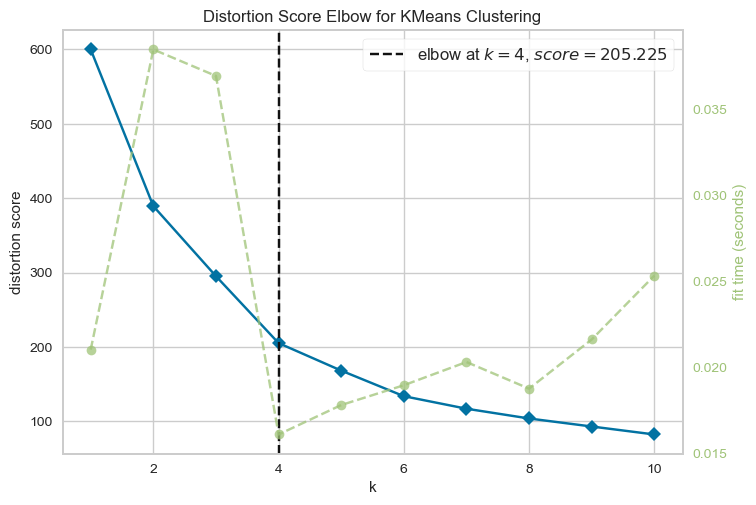

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [79]:
# Inicializar o KMeans com um número máximo de clusters a ser testado
kmeans = KMeans(n_init=10, random_state=42)

visualizer = KElbowVisualizer(kmeans, k=(1, 11))  # Testando para k de 1 a 10 clusters
visualizer.fit(df2_escalonado)  
visualizer.show()

#### N_clusters = 4

In [84]:
# Instanciando Kmeans novamente,agora com o número de clusters
kmeans2 = KMeans(n_clusters = 4, n_init=10, random_state=0)

# treinando o algoritmo e adicionando os grupos de cada cliente no dataframe original
df['Grupo'] = kmeans2.fit_predict(df2_escalonado)

In [96]:
df['Grupo'].value_counts()

Grupo
2    65
1    57
3    40
0    38
Name: count, dtype: int64

## Insights 

### Média de idade por grupo

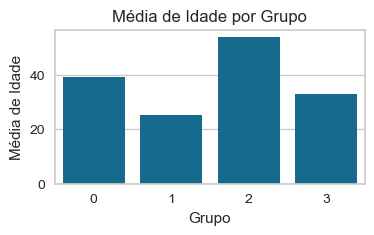

In [134]:
media_idade_grupo = df.groupby('Grupo')['Age'].mean().reset_index()

plt.figure(figsize=(4,2))
sns.barplot(x='Grupo', y='Age', data = media_idade_grupo)
plt.title('Média de Idade por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Média de Idade')
plt.show()

### Média de renda anual por grupo

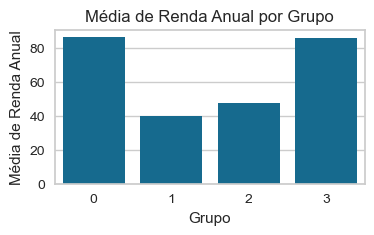

In [139]:
media_renda = df.groupby('Grupo')['Annual Income (k$)'].mean().reset_index()

# Gráfico de barras
plt.figure(figsize=(4,2))
sns.barplot(x='Grupo', y='Annual Income (k$)', data = media_renda)
plt.title('Média de Renda Anual por Grupo')
plt.xlabel('Grupo')
plt.ylabel('Média de Renda Anual')
plt.show()

### Idade vs Renda anual por grupo

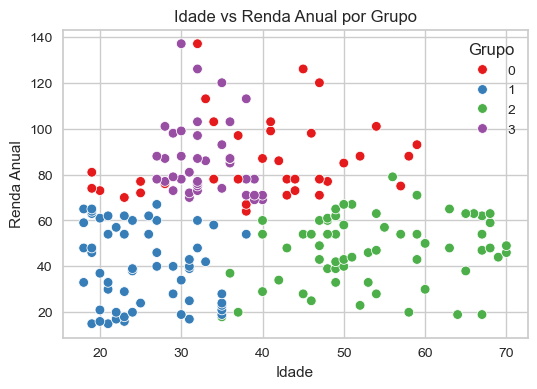

In [146]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Age', y='Annual Income (k$)', hue='Grupo', palette='Set1', data=df)
plt.title('Idade vs Renda Anual por Grupo')
plt.xlabel('Idade')
plt.ylabel('Renda Anual')
plt.legend(title='Grupo')
plt.show()

### Histograma de Idade por Grupo

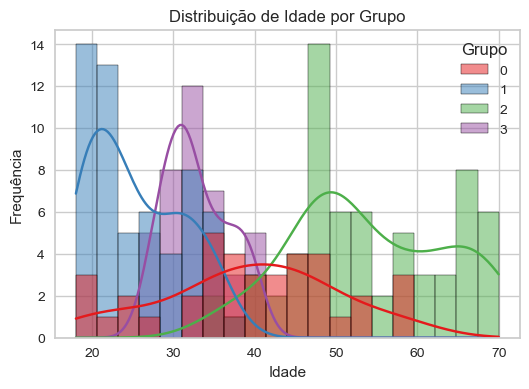

In [150]:
plt.figure(figsize=(6,4))
sns.histplot(df, x='Age', hue='Grupo', kde=True, bins=20, palette='Set1')
plt.title('Distribuição de Idade por Grupo')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

### Estatística descritiva por grupo

In [178]:
numeric_columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
print("\n=== Estatística descritivas por grupo ===")
for cluster in range(0,4):
  print(f"\nGrupo {cluster}:")
  df_clusters = df[df['Grupo'] == cluster]
  print(df_clusters[numeric_columns].describe())

  #Composição de gênero por cluster
  print("\nComposição de gênero por grupo:")
  print(df_clusters['Gender'].value_counts())


=== Estatística descritivas por grupo ===

Grupo 0:
             Age  Annual Income (k$)  Spending Score (1-100)
count  38.000000           38.000000               38.000000
mean   39.368421           86.500000               19.578947
std    10.617225           16.761845               11.684204
min    19.000000           64.000000                1.000000
25%    34.000000           75.250000               10.500000
50%    40.500000           79.500000               17.000000
75%    46.750000           96.000000               27.750000
max    59.000000          137.000000               42.000000

Composição de gênero por grupo:
Gender
Female    19
Male      19
Name: count, dtype: int64

Grupo 1:
             Age  Annual Income (k$)  Spending Score (1-100)
count  57.000000           57.000000               57.000000
mean   25.438596           40.000000               60.298246
std     5.707193           17.031483               18.434212
min    18.000000           15.000000                

# Conclusões por grupo
### Grupo 0 
#### . Idade média de 39 anos
#### . Renda média de 86k
#### . Spending Score baixo
#### . Este grupo tem uma boa renda, mas tende a ser mais cauteloso com os gastos. Potencial para programas de fidelidades

### Grupo 1 
#### . Idade média de 25 anos
#### . Renda média de 40k
#### . Spending Score medio/alto
#### . O Grupo 1 é formado por jovens que tem uma disposição para gastar maior. Excelente público para marketing digital

### Grupo 2 
#### . Idade média de 53 anos
#### . Renda média de 47k
#### . Spending Score baixo/médio
#### . O Grupo 2 tem idade média/avançada e um perfil financeiro mais cauteloso. Oportunidade para produtos de investimento

### Grupo 3
#### . Idade média de 32 anos
#### . Renda média de 86k
#### . Spending Score alto
#### . O Grupo 3 tem um perfil de consumidores de alta renda e com alta disposição para gastar. Público-alvo para produtos de  luxo